In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/spam.csv'

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/spam.csv'
/content


In [ ]:
# import libraries
import pandas as pd
import numpy as np
#import dataset


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spammessages.csv",usecols=['v1','v2'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
#changing labels
dataset['label']=dataset['v1'].map({'ham':0,'spam':1})

In [ ]:
dataset

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

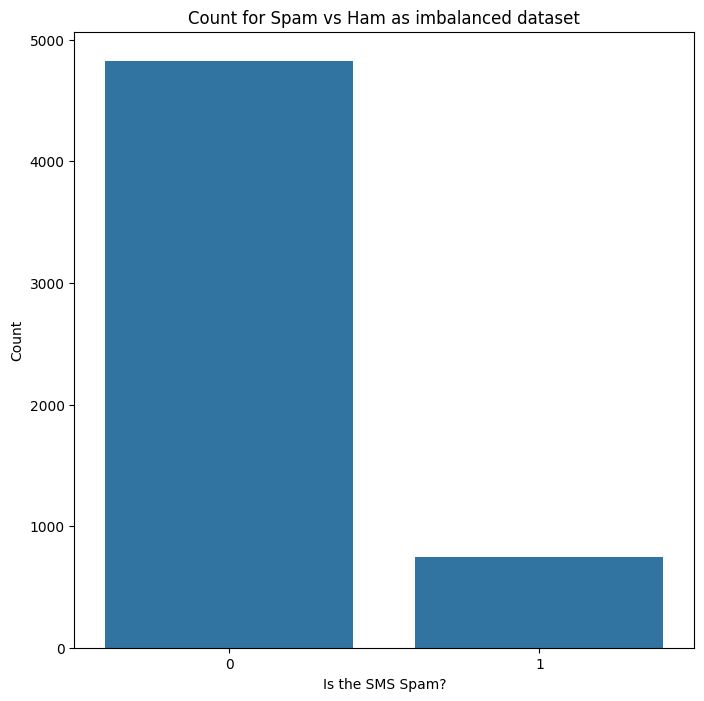

In [ ]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('Count for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')


In [ ]:
only_spam=dataset[dataset['label']==1]
only_spam

,v1,v2,label
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
dataset.shape

(5572, 3)

In [ ]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [ ]:
count

6

In [ ]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])

In [ ]:
dataset

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
dataset.reset_index()

,index,v1,v2,label
0,0,ham,"Go until jurong point, crazy.. Available only ...",0
1,1,ham,Ok lar... Joking wif u oni...,0
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,3,ham,U dun say so early hor... U c already then say...,0
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...,...
9302,5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
9303,5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
9304,5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
9305,5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


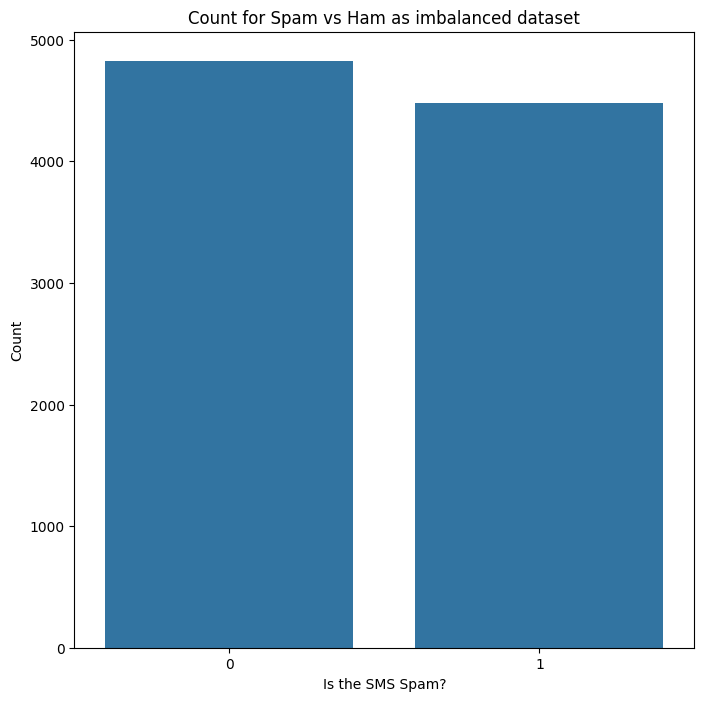

In [ ]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('Count for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [ ]:
dataset['word_count']=dataset['v2'].apply(lambda x:len(x.split()))

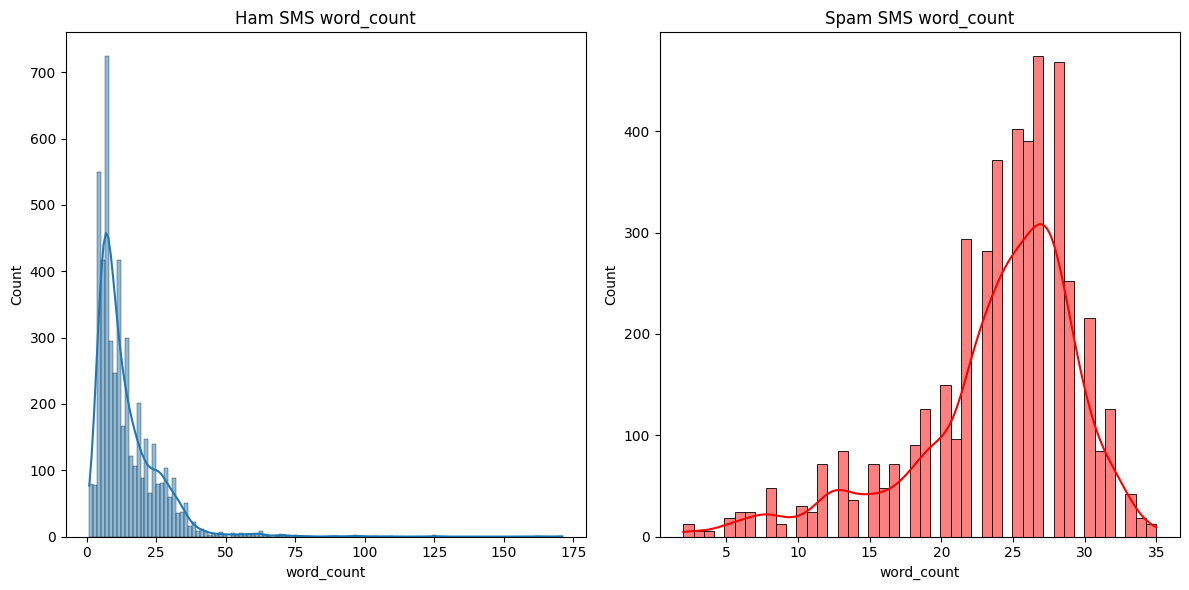

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde=True)
p=plt.title("Ham SMS word_count")
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,color="red",kde=True)
p=plt.title("Spam SMS word_count")
plt.tight_layout()
plt.show()

In [ ]:
def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [ ]:
dataset["contains_currency_symbol"]=dataset["v2"].apply(currency)

In [ ]:
dataset

,v1,v2,label,word_count,contains_currency_symbol
0,ham,"Go until jurong point, crazy.. Available only ...",0,20,0
1,ham,Ok lar... Joking wif u oni...,0,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,ham,U dun say so early hor... U c already then say...,0,11,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,0
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0


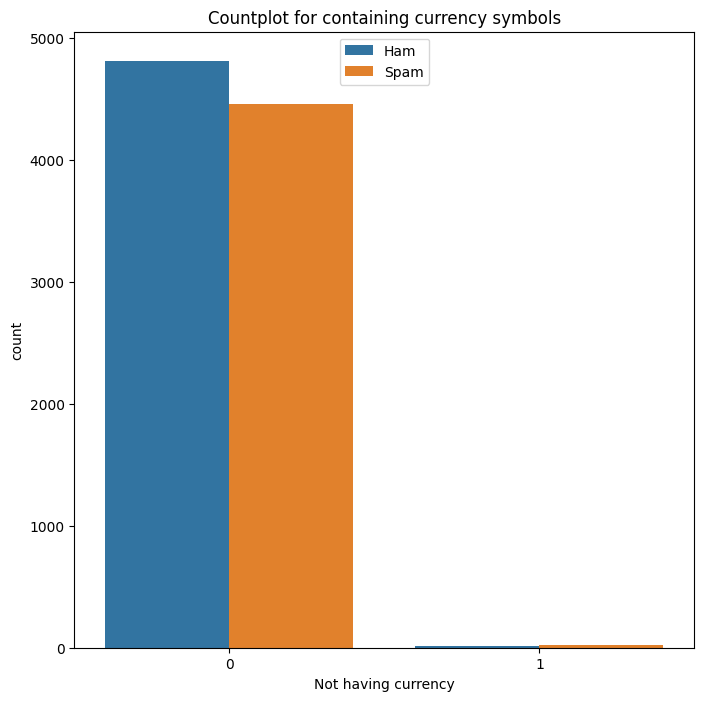

In [ ]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_currency_symbol",data=dataset,hue="v1")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing currency symbols")
p=plt.xlabel("Not having currency")
p=plt.ylabel("count")

In [ ]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [ ]:
dataset["contains_number"]=dataset["v2"].apply(number)

In [ ]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


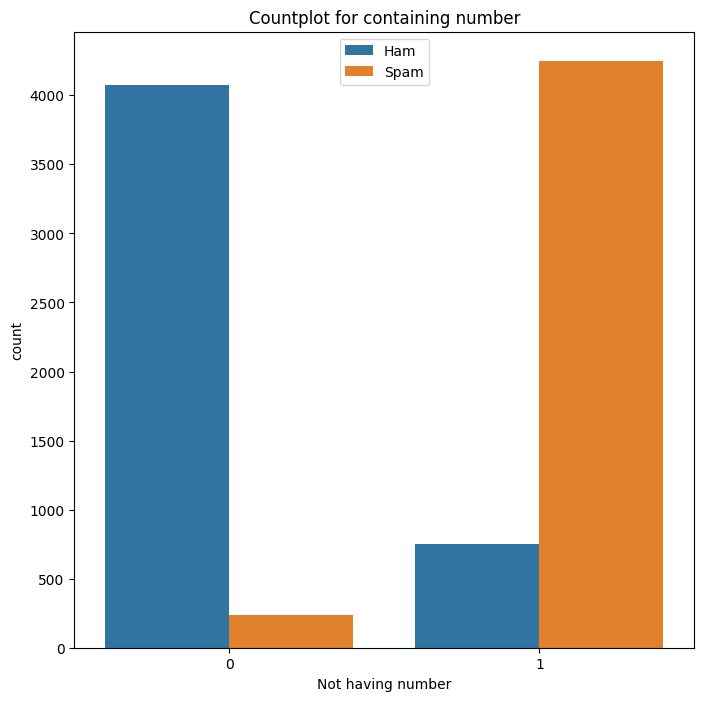

In [ ]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_number",data=dataset,hue="v1")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing number")
p=plt.xlabel("Not having number")
p=plt.ylabel("count")

In [ ]:
#data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.v2):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=sms.lower()
    words=sms.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    corpus.append(sms)

In [ ]:
corpus

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [ ]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [ ]:
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [ ]:
x

,00,000,03,04,0800,08000839402,08000930705,10,100,1000,...,yeah,year,years,yes,yet,yo,you,your,yours,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.278662,0.0,0.0,0.0,0.000000,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.245606,0.0,0.0,0.0,0.137584,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.131188,0.0,0.0


In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#naive bayes model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


0.944
0.004


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

1155    0
1790    0
3003    1
1121    1
592     1
       ..
4147    1
274     0
1345    0
2366    1
4031    0
Name: label, Length: 1862, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       958
           1       0.97      0.94      0.96       904

    accuracy                           0.96      1862
   macro avg       0.96      0.96      0.96      1862
weighted avg       0.96      0.96      0.96      1862



In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[932,  26],
       [ 53, 851]])

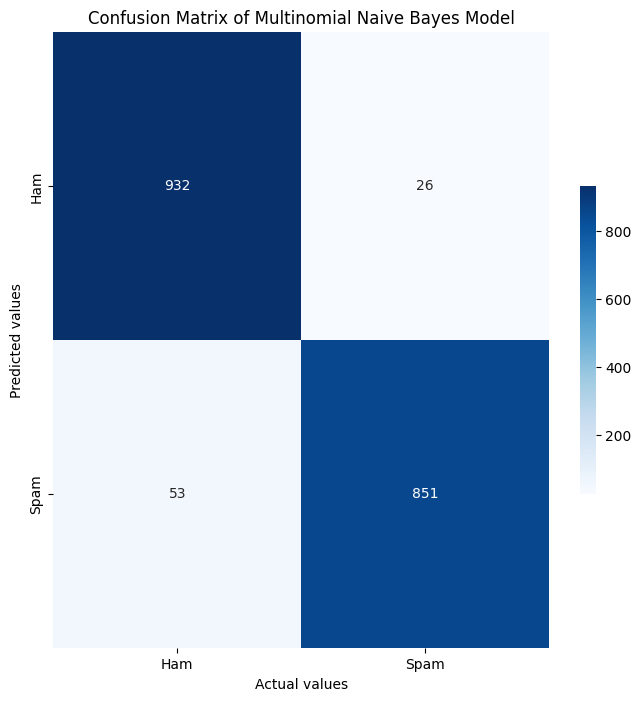

In [ ]:
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.984
0.006


In [ ]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       958
           1       0.97      0.94      0.96       904

    accuracy                           0.96      1862
   macro avg       0.96      0.96      0.96      1862
weighted avg       0.96      0.96      0.96      1862



In [ ]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[936,  22],
       [  3, 901]])

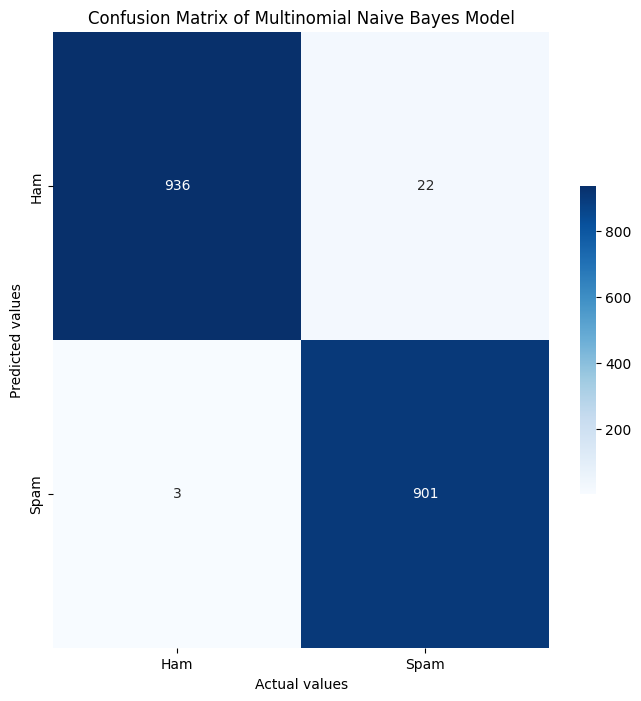

In [ ]:
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()

In [ ]:
# import libraries
import pandas as pd
import numpy as np
#import dataset
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spammessages.csv",usecols=['v1','v2'])
dataset.info()
dataset.describe()
#changing labels
dataset['label']=dataset['v1'].map({'ham':0,'spam':1})
dataset
dataset.describe()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('Count for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')
only_spam=dataset[dataset['label']==1]
only_spam
dataset.shape
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset
dataset.reset_index()
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('Count for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')
dataset['word_count']=dataset['v2'].apply(lambda x:len(x.split()))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde=True)
p=plt.title("Ham SMS word_count")
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,color="red",kde=True)
p=plt.title("Spam SMS word_count")
plt.tight_layout()
plt.show()
def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0
dataset["contains_currency_symbol"]=dataset["v2"].apply(currency)
dataset
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_currency_symbol",data=dataset,hue="v1")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing currency symbols")
p=plt.xlabel("Not having currency")
p=plt.ylabel("count")
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0
dataset["contains_number"]=dataset["v2"].apply(number)
dataset
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_number",data=dataset,hue="v1")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing number")
p=plt.xlabel("Not having number")
p=plt.ylabel("count")
#data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.v2):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=sms.lower()
    words=sms.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    corpus.append(sms)
corpus
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']
x
y
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#naive bayes model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
y_pred
y_test
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred1)
cm
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)
#prediction
sample="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
if predict_spam(sample):
    print("This is a Spam Message")
else:
    print("This is not Spam")

In [ ]:
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [ ]:
#prediction
sample="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
if predict_spam(sample):
    print("This is a Spam Message")
else:
    print("This is not Spam")

This is a Spam Message


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
